Glenda dos Santos Silva
RA - 3019202917 

**Concatenar arquivos**

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import gensim
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from pprint import pprint
from wordcloud import WordCloud
import logging

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
caminho = '/content/drive/MyDrive/InteligenciaArtificial'

In [ ]:
for f in os.listdir(caminho):
  print(f)

reclamacoes-fundamentadas-sindec-2013.csv
reclamacoes-fundamentadas-sindec-2014.csv
reclamacoes-fundamentadas-sindec-2015.csv
reclamacoes-fundamentadas-sindec-2012.csv
reclamacoes-fundamentadas-sindec-2016.csv


In [ ]:
files = []

for f in os.listdir(caminho):
  if f != 'teste.csv':
    files.append(f)

In [ ]:
for f in files:
  print(caminho + '/' + f )

/content/drive/MyDrive/InteligenciaArtificial/reclamacoes-fundamentadas-sindec-2013.csv
/content/drive/MyDrive/InteligenciaArtificial/reclamacoes-fundamentadas-sindec-2014.csv
/content/drive/MyDrive/InteligenciaArtificial/reclamacoes-fundamentadas-sindec-2015.csv
/content/drive/MyDrive/InteligenciaArtificial/reclamacoes-fundamentadas-sindec-2012.csv
/content/drive/MyDrive/InteligenciaArtificial/reclamacoes-fundamentadas-sindec-2016.csv


In [ ]:
df = pd.DataFrame()

type(df)

pandas.core.frame.DataFrame

In [ ]:
for f in files:
  frames = pd.read_csv(caminho + "/" + f)
  df = df.append(frames, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2013,2013-07-17 13:42:50.000,2013-06-27 10:41:31.000,3,Sudeste,MG,BOMSUCESSO,NaN,1,NaN,...,NaN,NaN,S,63,Financeira,217.0,Antecipação de Financiamento,F,entre 51 a 60 anos,35300038
1,2013,2013-01-16 09:31:19.000,2012-12-06 09:33:00.000,2,Nordeste,RN,LOJAS INSINUANTE,NaN,1,NaN,...,NaN,NaN,S,101,"Telefone ( Convencional, Celular, Interfone, E...",102.0,"Garantia (Abrangência, cobertura, etc.)",F,entre 41 a 50 anos,59617335
2,2013,2013-09-12 09:42:11.000,2013-06-03 08:20:01.000,2,Nordeste,PE,AVELLOZ,AVELLOZ,1,NaN,...,NaN,NaN,S,145,Motos,105.0,Produto com vício,F,entre 41 a 50 anos,55036830
3,2013,2013-08-14 09:00:34.000,2013-07-18 08:46:37.000,3,Sudeste,RJ,EDSON RIBEIRO GONÇALVES JUNIOR,MEU LIVRO MINHA VIDA,1,NaN,...,NaN,NaN,N,235,Curso de Línguas,192.0,Desistência do serviço (artigo 49 - descumprim...,M,entre 51 a 60 anos,25035520
4,2013,2013-06-28 11:52:58.000,2013-06-10 13:23:23.000,3,Sudeste,RJ,CENTRO UNIVERSITÁRIO PLÍNIO LEITE,UNIPLI,1,NaN,...,NaN,NaN,N,236,Cursos Livres Outros,184.0,Serviço não fornecido (entrega/instalação/não ...,F,até 20 anos,24425470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206067,2016,2016-08-24 10:19:29.000,2016-05-06 11:21:45.000,3,Sudeste,SP,OI MÓVEL S/A,OI CELULAR/OI TV,1,5.423963e+12,...,6120501.0,TELEFONIA MÓVEL CELULAR,S,187,Telefonia Celular,143.0,Contrato - Rescisão/alteração unilateral,M,entre 51 a 60 anos,4763310.0
1206068,2016,2016-10-27 09:19:09.000,2016-05-02 15:28:57.000,3,Sudeste,SP,ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,ELETROPAULO METROPOLITANA,1,6.169523e+13,...,3514000.0,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,N,185,Energia Elétrica,134.0,Cobrança indevida/abusiva,M,entre 41 a 50 anos,4846010.0
1206069,2016,2016-09-21 09:11:21.000,2016-04-29 16:20:30.000,3,Sudeste,SP,AUTO ESCOLA ULTRA FACIL LTDA EPP,NaN,1,1.802559e+13,...,8599601.0,FORMAÇÃO DE CONDUTORES,S,264,Automóvel - Locação / Assistência Automobilíst...,185.0,Serviço não concluído /Fornecimento parcial,F,entre 21 a 30 anos,5731090.0
1206070,2016,2016-08-16 10:58:52.000,2016-04-19 07:58:16.000,3,Sudeste,SP,FINANCEIRA ITAU CBD S/A CRÉDITO FINANCIAMENTO ...,FIC FINANCEIRA ITAÚ CBD / FIT,1,6.881898e+12,...,6436100.0,"SOCIEDADES DE CRÉDITO, FINANCIAMENTO E INVESTI...",S,53,Banco comercial,28.0,Cobrança indevida/abusiva,F,entre 21 a 30 anos,4438250.0


**Porcentagem de reclamações por ano**

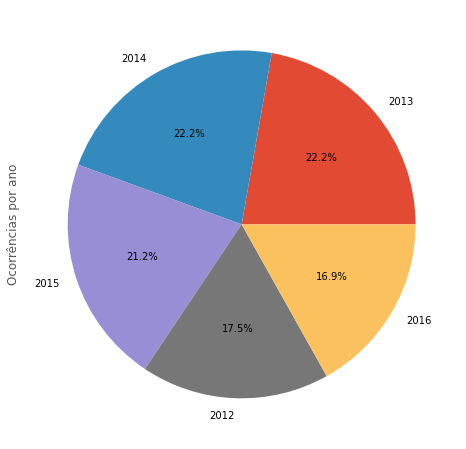

In [ ]:
plt.style.use("ggplot")

df['AnoCalendario'].value_counts().plot(kind='pie',autopct='%1.1f%%' ,label="Ocorrências por ano" ,figsize=(8, 8))
plt.show()

**Mineração de Texto**

Categorizando os textos

In [ ]:
dfhead = df.head(30)
dfhead = dfhead.replace({np.nan:""})

texto = []
for i in dfhead['DescricaoProblema']:
  texto.append(i)

sTexto = " ".join(texto)
print(sTexto)

Antecipação de Financiamento Garantia (Abrangência, cobertura, etc.) Produto com vício Desistência do serviço (artigo 49 - descumprimento) Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato) Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato) Fila em Banco Cobrança indevida. Cobrança indevida. Cobrança indevida/abusiva Produto com vício Cobrança indevida/abusiva Produto com vício Cobrança indevida. Cobrança indevida. Desistência de consorcio Cobrança indevida. Produto com vício Consumidor negativado indevidamente nos serviços de proteção ao credito Não entrega/demora na entrega do produto Produto com vício Cobrança indevida/abusiva Produto com vício Garantia (Abrangência, cobertura, etc.) Garantia (Abrangência, cobertura, etc.) Garantia (Abrangência, cobertura, etc.) Falta de peca de reposição Desistência de compra (cancelamento de compra) Não entrega/demora na entrega do produto Serviço não fornecido (entrega/instalação/não cumprimen

Limpeza e tokenização

In [ ]:
# limpar pontuação e numeral
tokenizer = RegexpTokenizer(r'[A-z]\w*')

# variavel com os tokens sem pontuacao e numeral do dataset
tokens = tokenizer.tokenize(sTexto)


print(tokens)

['Antecipação', 'de', 'Financiamento', 'Garantia', 'Abrangência', 'cobertura', 'etc', 'Produto', 'com', 'vício', 'Desistência', 'do', 'serviço', 'artigo', 'descumprimento', 'Serviço', 'não', 'fornecido', 'entrega', 'instalação', 'não', 'cumprimento', 'da', 'oferta', 'contrato', 'Serviço', 'não', 'fornecido', 'entrega', 'instalação', 'não', 'cumprimento', 'da', 'oferta', 'contrato', 'Fila', 'em', 'Banco', 'Cobrança', 'indevida', 'Cobrança', 'indevida', 'Cobrança', 'indevida', 'abusiva', 'Produto', 'com', 'vício', 'Cobrança', 'indevida', 'abusiva', 'Produto', 'com', 'vício', 'Cobrança', 'indevida', 'Cobrança', 'indevida', 'Desistência', 'de', 'consorcio', 'Cobrança', 'indevida', 'Produto', 'com', 'vício', 'Consumidor', 'negativado', 'indevidamente', 'nos', 'serviços', 'de', 'proteção', 'ao', 'credito', 'Não', 'entrega', 'demora', 'na', 'entrega', 'do', 'produto', 'Produto', 'com', 'vício', 'Cobrança', 'indevida', 'abusiva', 'Produto', 'com', 'vício', 'Garantia', 'Abrangência', 'cobertura

Frequência das palavras do texto

In [ ]:
# frequencia dos tokens do texto deixando todo o texto em minusculo
freq = nltk.FreqDist(t.lower() for t in tokens)

# ordenar a frequencia dos tokens mais frequentes
print(freq.most_common())

[('produto', 8), ('não', 8), ('cobrança', 8), ('indevida', 8), ('de', 7), ('entrega', 7), ('com', 6), ('vício', 6), ('garantia', 4), ('abrangência', 4), ('cobertura', 4), ('etc', 4), ('serviço', 4), ('desistência', 3), ('do', 3), ('fornecido', 3), ('instalação', 3), ('cumprimento', 3), ('da', 3), ('oferta', 3), ('contrato', 3), ('abusiva', 3), ('demora', 2), ('na', 2), ('compra', 2), ('antecipação', 1), ('financiamento', 1), ('artigo', 1), ('descumprimento', 1), ('fila', 1), ('em', 1), ('banco', 1), ('consorcio', 1), ('consumidor', 1), ('negativado', 1), ('indevidamente', 1), ('nos', 1), ('serviços', 1), ('proteção', 1), ('ao', 1), ('credito', 1), ('falta', 1), ('peca', 1), ('reposição', 1), ('cancelamento', 1)]


Stopwords

In [ ]:
#  variavel contendo os stopwords em portugues
stopwords =  nltk.corpus.stopwords.words('portuguese')

# variavel contendo os tokens sem stopwords
tokens_palavras = [t.lower() for t in tokens if t not in stopwords]

# frequencia dos tokens do texto sem stopword
freq = nltk.FreqDist(tokens_palavras)

# frequencia dos tokens sem stopwords
print(freq.most_common())

[('produto', 8), ('cobrança', 8), ('indevida', 8), ('entrega', 7), ('vício', 6), ('garantia', 4), ('abrangência', 4), ('cobertura', 4), ('etc', 4), ('serviço', 4), ('desistência', 3), ('fornecido', 3), ('instalação', 3), ('cumprimento', 3), ('oferta', 3), ('contrato', 3), ('abusiva', 3), ('não', 2), ('demora', 2), ('compra', 2), ('antecipação', 1), ('financiamento', 1), ('artigo', 1), ('descumprimento', 1), ('fila', 1), ('banco', 1), ('consorcio', 1), ('consumidor', 1), ('negativado', 1), ('indevidamente', 1), ('serviços', 1), ('proteção', 1), ('credito', 1), ('falta', 1), ('peca', 1), ('reposição', 1), ('cancelamento', 1)]


Nuvem de palavras

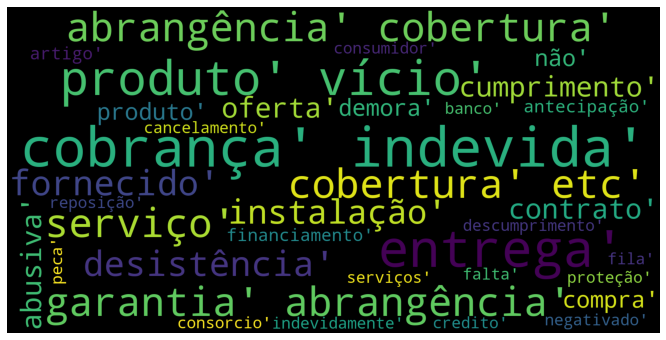

In [ ]:
# converter os dados dos tokens em string, pois estao como lista
palavras= str(tokens_palavras)

# criar a nuvem de palavras
nuvempalavras = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1800, height=900).generate(palavras)

# imagem da nuvem de palavras
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(nuvempalavras, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(nuvempalavras);
nuvempalavras.to_file("discurso.png");